卷积神经网络是由一位计算机科学家Yann LeCun所提出的，他在机器学习、计算机视觉和计算神经科学等诸多领域都有贡献。  

# 1 卷积神经网络简介  

## 1.1 多层感知器与卷积神经网络  

如图所示，多层感知器与卷积神网络主要的差异是：卷积神经网络增加了卷积层和池化层的处理来提取特征。  
![title](images/8.1.png)  

## 1.2 卷积神经网络介绍  
从上图中可以看到卷积神经网络可以分为两大部分  

- 图像的特征提取  
通过卷积层1、池化层1、卷积层2、池化层2提取的特征  
- 完全连接的神经网络  
包含；平坦层、隐藏层、输出层、所组成的类神经网络，如图8-2所示。  
<center>![title](images/8.2.png)</center>    
从图8-2中，我们可以看到从这些图像中提取了“7”的图像特征，卷积运算的效果类似滤镜效果，即用于提取不同的特征。  

## 1.3 卷积运算  

卷积层的的意义是将原本一个图像经过卷积运算产生多个图像，就好像将相片叠加起来。  

- 卷积运算的方式  
1. 先按照随机的方式产生，filter weight大小是$3\times 3$。  
2. 要转换的图像从左到右、自上而下，按序选取$3\times 3$的矩阵。  
3. 图像选取的矩阵与filter weight乘积，计算第一行，第一列的数字。  
![title](images/8.3.png)  
再以相同的方式计算第一行、第二列的数字，如下图所示：
![title](images/8.4.png)  
按照上面的相同方式，按序完成所有运算，就可以完成图像的处理。

## 1.4 使用单个filter weight卷积运算产生图像  
如图所示：将大小为$28\times 28$的数字图形3，使用随机产生的$5\times 5$filter weight滤镜进行卷积运算。  
![title](images/8.5.png)  
卷积运算并不会改变图形大小，所以处理后的图像大小任然是$28\times 28$。卷积运算后的效果很类似滤镜效果，这可以帮助我们提取输入的不同特征，例如边缘、线条和角等。  

## 1.5 使用多个filter weight卷积运算产生多个图像  

接下来，我们将随机产生16个filter weight，也就是16个滤镜。  
卷积运算使用16个滤镜产生16个图像，每个图像提取不同的特征，如图所示。  
![title](images/8.6.png)  

## 1.6 Max-Pool运算说明  
Max-Pool运算可以对图像缩减采样，如图8-7所示，原本图像是$4\times 4$的，经过Max-Pooling后，图像大小为$2\times 2$的。  
![title](images/8.7.png)  
以上Max-Pooling运算详细说明如下：  

- **左上角4个数字：**5、2、4、1最大的是5，所以计算结果是5，如图所示：  
![title](images/8.8.png)  

- **左上角4个数字：**3、1、1、6最大的是6，所以计算结果是6，如图所示：  
![title](images/8.9.png)  

- **左上角4个数字：**7、8、1、1最大的是8，所以计算结果是8，如图所示：  
![title](images/8.10.png)  

- **左上角4个数字：**2、9、1、1最大的是9，所以计算结果是9，如图所示：  
![title](images/8.11.png)  

## 1.7 使用Max-Pooling转换手写数字图像  

使用Max-Pooling缩减采样，进行手写数字图像转换，将16个$28\times 28$的图像缩小为16个$14\times 14$的图像，但是不会改变图像的数量，如图8-12所示：  
![title](images/8.12.png)  
缩减采样会缩小图像，有下列好处：  
1. **减少需要处理的数据点：**  减少后续运算的时间。  
2. **让图像位置差异变小：**例如手写数字7，位置上下左右可能不同，位置的不同可能会影响识别。减小图像大小，让数字的位置差异变小。  
3. **参数的数量和计算量下降：**这在一定程度上也控制了过度拟合。  



## 1.8 建立卷积神经网络识别MNIST数据集  

建立卷积神经网络识别MNIST数据集的步骤如图8-13所示。  
![title](images/8.13.png)  


# 2 进行数据预处理  

卷积神经网络与多层感知器进行数据处理的方式不同，说明见表1。  

<center>卷积神经网络与多层感知器进行数据预处理对比</center>  

||reshape|说明|  
|-----|-----|-----|
|多层感知器|image.reshape(60000,784)|多层感知器因为直接送进神经元处理，所以reshpe转换为60000项，每一项有784个数字|
|卷积神经网络|image.reshape(60000,28,28,1)|卷积神经网络则要求必须保持图像的维数，所以reshape转换60000项，每一项是$28\times 28\times 1$的图像|

**导入所需模块**

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


**数据预处理**

In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

**建立模型**

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(Dropout(0.25))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(128, activation='relu'))

In [13]:
model.add(Dropout(0.5))

In [14]:
model.add(Dense(10,activation='softmax'))

In [15]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

**训练模型**

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [17]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 20s - loss: 0.5272 - acc: 0.8410 - val_loss: 0.1635 - val_acc: 0.9554
Epoch 2/20
 - 20s - loss: 0.2097 - acc: 0.9361 - val_loss: 0.1022 - val_acc: 0.9703
Epoch 3/20
 - 20s - loss: 0.1503 - acc: 0.9549 - val_loss: 0.0805 - val_acc: 0.9773
Epoch 4/20
 - 21s - loss: 0.1249 - acc: 0.9628 - val_loss: 0.0684 - val_acc: 0.9799
Epoch 5/20
 - 21s - loss: 0.1059 - acc: 0.9690 - val_loss: 0.0599 - val_acc: 0.9815
Epoch 6/20
 - 21s - loss: 0.0920 - acc: 0.9723 - val_loss: 0.0568 - val_acc: 0.9833
Epoch 7/20
 - 21s - loss: 0.0838 - acc: 0.9744 - val_loss: 0.0514 - val_acc: 0.9845
Epoch 8/20
 - 21s - loss: 0.0769 - acc: 0.9770 - val_loss: 0.0487 - val_acc: 0.9861
Epoch 9/20
 - 21s - loss: 0.0711 - acc: 0.9776 - val_loss: 0.0458 - val_acc: 0.9861
Epoch 10/20
 - 21s - loss: 0.0656 - acc: 0.9797 - val_loss: 0.0448 - val_acc: 0.9859
Epoch 11/20
 - 21s - loss: 0.0616 - acc: 0.9810 - val_loss: 0.0428 - val_acc: 0.9868
Epoch 12/20
 - 22s - los

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

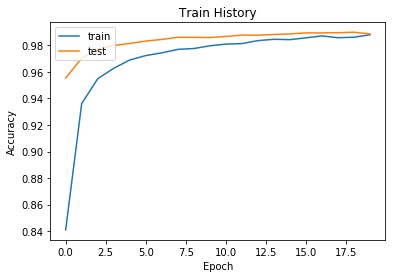

In [19]:
show_train_history('acc','val_acc')

In [21]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 2s 197us/step


0.9888

In [22]:
prediction=model.predict_classes(x_Test4D_normalize)

In [23]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

**查看预测结果**

In [25]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

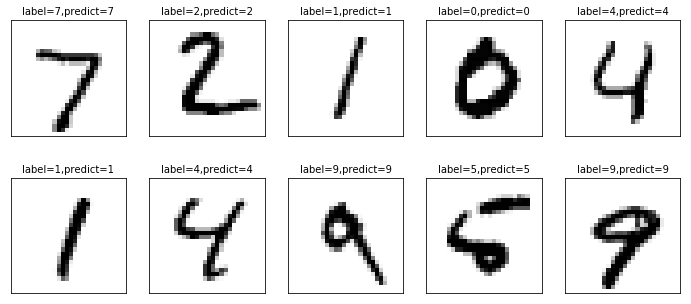

In [26]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

**混淆矩阵**

In [27]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,1,1,1,1,0
1,0,1128,2,2,0,0,1,1,1,0
2,3,0,1023,0,0,0,0,4,2,0
3,0,0,2,998,0,5,0,3,2,0
4,0,0,1,0,975,0,0,0,0,6
5,2,0,0,5,0,883,2,0,0,0
6,6,2,0,0,1,4,942,0,3,0
7,1,0,6,2,0,0,0,1016,1,2
8,4,0,2,2,0,1,0,2,957,6


In [28]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [29]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
4360,5,3
5937,5,3
